&copy; Mirko Piani - *PhD student in Precision Orchard Management (POM), university of Bologna (IT)*
___

If you are having problems with the notebook, contact me at mirko.piani2@unibo.it

![pandas-logo](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/2560px-Pandas_logo.svg.png)

The **material** used in this notebook can be found in [data](data/) folder:
- [fruit_gauge.csv](data/text_delimited/fruit_gauge.csv)
- [weather2022.xlsx](data/spreadsheet/weather2022.xlsx)
- [weather_2022_h.csv](data/text_delimited/weather_2022_h.csv)


# Introduction

## What is a Pandas Series

A Series is a **one-dimensional** labeled array that can hold any data type such as integers, strings, floating-point numbers, etc. It is similar to a column in an Excel spreadsheet or a database table.

The main characteristic of *Series* is that they contain a single column of data (*vector*).

## What is a Pandas DataFrames
Dataframe is a **tabular** (rows, columns) - *records, fields* - representation of data. It is a **two-dimensional** data structure with potentially heterogeneous data. It is similar to an entire spreadsheet.

Dataframe is a **size-mutable** structure that means data can be added or deleted from it, unlike data series, which does not allow operations that change its size.

<div>
<img src="../docs/.readme_images/dataframe.png" width="600"/>
</div>

**Differences Between Pandas `Series` and `DataFrames`**

| Feature         | Pandas Series                                                    | Pandas DataFrame                                                |
|-----------------|------------------------------------------------------------------|-----------------------------------------------------------------|
| Definition      | A one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, etc.). | A two-dimensional labeled data structure with columns of potentially different types. |
| Dimensions      | 1-Dimensional (1D)                                               | 2-Dimensional (2D)                                              |
| Data Structure  | Single column of data                                            | Tabular data consisting of rows and columns                     |
| Indexing        | Can be indexed by a single label                                  | Can be indexed by rows (index) and columns                      |
| Creation        | `pd.Series([1, 2, 3])`                                           | `pd.DataFrame({'col1': [1, 2], 'col2': [3, 4]})`                |
| Data Access     | Accessed using a single label, e.g., `s[0]`                      | Accessed using row and column labels, e.g., `df['col1'][0]`     |
| Operations      | Operations are element-wise                                      | Operations can be performed across rows, columns, or element-wise|
| Homogeneity     | All elements in a Series must be of the same data type           | Different columns can have different data types                 |
| Use Case        | Used for storing and manipulating a single column or array of data | Used for storing and manipulating tabular/multi-dimensional data |
| Conversion      | Can be converted to DataFrame using `s.to_frame()`               | Can be converted to Series by selecting a single column, e.g., `df['col1']` |
| Example         | `pd.Series([1, 2, 3, 4])`                                        | `pd.DataFrame({'A': [1, 2], 'B': [3, 4]})`                      |



Naming defaults:
| Operator | Description |
|:----: |:---- |
| **`df`** | **pandas DataFrame object** | 
| **`s`**  | **pandas Series object** |

# Use Pandas

import pandas

In [2]:
import pandas as pd

use pandas calling it `pd`

# read data

In [22]:
# import data from a CSV file into a dataframe (df) object
df = pd.read_csv('../data/text_delimited/fruit_gauge.csv')

print(df)

                  TimeStamp  MeasuredFruitSize
0      05-Jul-2023 19:07:22          45.582827
1      05-Jul-2023 19:10:22          45.583562
2      05-Jul-2023 19:13:22          45.584263
3      05-Jul-2023 19:16:24          45.584992
4      05-Jul-2023 19:19:26          45.584992
...                     ...                ...
62453  20-Oct-2023 20:54:44           0.000000
62454  20-Oct-2023 20:55:01           0.000000
62455  20-Oct-2023 20:57:44           0.000000
62456  20-Oct-2023 20:58:00           0.000000
62457  20-Oct-2023 21:00:44           0.000000

[62458 rows x 2 columns]


by printing the `dataframe` it is possible to notice that it has *62458* records and *2* columns named `TimeStamp` and `MeasuredFruitSize`

# Define the `dtype`

get **data type**

In [3]:
print(df.dtypes)

TimeStamp             object
MeasuredFruitSize    float64
dtype: object


get **memory usage**

In [4]:
memory_usage_default = df.memory_usage(deep=True).sum()
print(f'{memory_usage_default} Bytes')

5309058 Bytes


in *Pandas*, `str` variables are defined as `object` variables. In *Pandas*, all the other datatypes are unchanged. But `datetime` is added, which is essential for time series analysis, date-based indexing, and performing date arithmetic.

In [5]:
# set 'TimeStamp' column as datetime dtype
df['TimeStamp'] = pd.to_datetime(df['TimeStamp'])


# save up memory by setting fruit size at a lower precision
df['MeasuredFruitSize'] = df['MeasuredFruitSize'].astype('float32')

# check changes
print(df.dtypes)

memory_usage_set_dtype = df.memory_usage(deep=True).sum()
print(f'\n{memory_usage_set_dtype} Bytes')

TimeStamp            datetime64[ns]
MeasuredFruitSize           float32
dtype: object

749624 Bytes


checking if by setting the proper `dtype` there is a saving in RAM memory usage:

In [6]:
print(memory_usage_set_dtype < memory_usage_default)

True


 ## Pandas Data Types (`dtypes`)

| Data Type    | Description                                                                 | Example Data                                               | Memory Usage     |
|--------------|-----------------------------------------------------------------------------|------------------------------------------------------------|------------------|
| `int64`      | 64-bit integer. Used for integer numbers without decimal points.            | `[1, 2, 3, 100]`                                           | 8 bytes per item |
| `float64`    | 64-bit floating point. Used for real numbers with decimal points.           | `[1.0, 2.5, 3.14, 100.0]`                                  | 8 bytes per item |
| `float32`    | 32-bit floating point. Used for real numbers with decimal points, less precise. | `[1.0, 2.5, 3.14, 100.0]`                                  | 4 bytes per item |
| `bool`       | Boolean type. Used for True/False values.                                   | `[True, False, True, True]`                                | 1 byte per item  |
| `category`   | Categorical data type. Used for fields that have a fixed number of values.  | `['apple', 'banana', 'cherry']`                            | Variable (depends on unique values) |
| `object`     | Generic type. Used for string or mixed types.                               | `['apple', 'banana', 'cherry']` or `[1, 'two', 3.0]`       | Variable (depends on data) |
| `datetime64` | Date and time type. Used for date and time data.                            | `['2024-01-01', '2024-06-17']`                             | 8 bytes per item |
| `timedelta64`| Difference between two dates or times.                                      | `[pd.Timedelta('1 days'), pd.Timedelta('2 days')]`         | 8 bytes per item |
| `int8`       | 8-bit integer. Used for very small integer ranges.                          | `[1, -2, 3, -128]`                                         | 1 byte per item  |
| `int16`      | 16-bit integer. Used for small integer ranges.                              | `[1, 200, 300, -32768]`                                    | 2 bytes per item |
| `int32`      | 32-bit integer. Used for larger integer ranges.                             | `[1, 200, 300, 2147483647]`                                | 4 bytes per item |



**Usage Tips:**
- **Use `int8`, `int16`, `int32`, `float32`** when you need to save memory and know your data fits within the range of these types.
- **Use `category`** for columns with a limited set of unique values to save memory and improve performance.
- **Use `object`** only if necessary, as it is the most memory-consuming data type.
- **Use `datetime64`** and `timedelta64` for efficient date and time operations.

# Exploring data

check **if empty**

In [7]:
print(f'is empty? --> {df.empty}')

is empty? --> False


get **shape** of the dataframe

In [8]:
print(f'(rows, columns) = {df.shape}')

(rows, columns) = (62458, 2)


get **number of values** (rows * columns)

In [9]:
print(f'{df.size}')

124916


visualize 5 `head` and `tail` rows

In [10]:
df.head(5)

,TimeStamp,MeasuredFruitSize
0,2023-07-05 19:07:22,45.582829
1,2023-07-05 19:10:22,45.583561
2,2023-07-05 19:13:22,45.584263
3,2023-07-05 19:16:24,45.584991
4,2023-07-05 19:19:26,45.584991


In [11]:
df.tail(5)

,TimeStamp,MeasuredFruitSize
62453,2023-10-20 20:54:44,0.0
62454,2023-10-20 20:55:01,0.0
62455,2023-10-20 20:57:44,0.0
62456,2023-10-20 20:58:00,0.0
62457,2023-10-20 21:00:44,0.0


get a **statistical description** of numerical columns

In [12]:
df.describe()

,TimeStamp,MeasuredFruitSize
count,62458,62458.000000
mean,2023-09-09 00:50:22.298808832,50.394447
min,2023-07-05 19:07:22,0.000000
25%,2023-08-08 05:15:03,53.855151
50%,2023-09-16 23:44:50,56.403133
75%,2023-10-04 08:03:58.249999872,68.045626
max,2023-10-20 21:00:44,68.168419
std,NaN,22.062109


get **metadata**:

`df.info` is a usefull method that gives metadata of a dataframe, such as:
+ number of rows
+ index range
+ list od columns
+ count of `null` values per columns
+ count of non-null values per column
+ data type per column
+ count of column per `dtype`
+ memory usage

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62458 entries, 0 to 62457
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   TimeStamp          62458 non-null  datetime64[ns]
 1   MeasuredFruitSize  62458 non-null  float32       
dtypes: datetime64[ns](1), float32(1)
memory usage: 732.1 KB


get **column names**

In [14]:
print(df.columns)

Index(['TimeStamp', 'MeasuredFruitSize'], dtype='object')


get **values**

In [15]:
print(df.values)

[[Timestamp('2023-07-05 19:07:22') 45.582828521728516]
 [Timestamp('2023-07-05 19:10:22') 45.583560943603516]
 [Timestamp('2023-07-05 19:13:22') 45.58426284790039]
 ...
 [Timestamp('2023-10-20 20:57:44') 0.0]
 [Timestamp('2023-10-20 20:58:00') 0.0]
 [Timestamp('2023-10-20 21:00:44') 0.0]]


get **record labels (index)**

**`Index`** are something of a peculiarity to pandas.

In pandas, **`Index`** are about labels. This helps with data selection and automatic alignment when performing operations between two **DataFrames** or **Series** such as join, data fusion.

In [16]:
print(df.index)
print(df.index.values)

RangeIndex(start=0, stop=62458, step=1)
[    0     1     2 ... 62455 62456 62457]


# Accessing data

A *Series* can be obtained from a *DataFrame* when selecting a column:

In [17]:
s = df['MeasuredFruitSize']

# print object type
print(f'Series: {type(s)}')
print(f'DataFrame: {type(df)}')

Series: <class 'pandas.core.series.Series'>
DataFrame: <class 'pandas.core.frame.DataFrame'>


In *Pandas* it is possible to access data similarly to *Numpy* via **indexing**.

The first improvement over numpy arrays is labeled indexing. It is possible to select subsets by column, row, or both.

In [18]:
# access Series/ single column

df['MeasuredFruitSize']

0        45.582829
1        45.583561
2        45.584263
3        45.584991
4        45.584991
           ...    
62453     0.000000
62454     0.000000
62455     0.000000
62456     0.000000
62457     0.000000
Name: MeasuredFruitSize, Length: 62458, dtype: float32

In [20]:
df.get('MeasuredFruitSize')  # same output, different method 

0        45.582829
1        45.583561
2        45.584263
3        45.584991
4        45.584991
           ...    
62453     0.000000
62454     0.000000
62455     0.000000
62456     0.000000
62457     0.000000
Name: FruitSize, Length: 62458, dtype: float32

In [57]:
# access third element of a Series/ single column

df['MeasuredFruitSize'][2]

45.584263

In [59]:
# get from third to 25th element of a Series/ single column

df['MeasuredFruitSize'][2: 26]  # last is exclusinve index [included, exluded)

2     45.584263
3     45.584991
4     45.584991
5     45.586201
6     45.586906
7     45.587639
8     45.588379
9     45.589134
10    45.589855
11    45.590580
12    45.591343
13    45.592098
14    45.592834
15    45.593613
16    45.594357
17    45.595062
18    45.595779
19    45.596485
20    45.597202
21    45.597919
22    45.598644
23    45.599388
24    45.600147
25    45.600952
Name: MeasuredFruitSize, dtype: float32

In [60]:
# access multiple columns by index

df.loc[3:25]

,TimeStamp,MeasuredFruitSize
3,2023-07-05 19:16:24,45.584991
4,2023-07-05 19:19:26,45.584991
5,2023-07-05 19:22:24,45.586201
6,2023-07-05 19:25:25,45.586906
7,2023-07-05 19:28:24,45.587639
8,2023-07-05 19:31:24,45.588379
9,2023-07-05 19:34:24,45.589134
10,2023-07-05 19:37:24,45.589855
11,2023-07-05 19:40:24,45.590580
12,2023-07-05 19:43:24,45.591343


In [62]:
# access multiple columns by index and column name

df.loc[3:25, 'MeasuredFruitSize']

3     45.584991
4     45.584991
5     45.586201
6     45.586906
7     45.587639
8     45.588379
9     45.589134
10    45.589855
11    45.590580
12    45.591343
13    45.592098
14    45.592834
15    45.593613
16    45.594357
17    45.595062
18    45.595779
19    45.596485
20    45.597202
21    45.597919
22    45.598644
23    45.599388
24    45.600147
25    45.600952
Name: MeasuredFruitSize, dtype: float32

In [63]:
# access multiple columns by index and column index

df.iloc[3:25, 1]

3     45.584991
4     45.584991
5     45.586201
6     45.586906
7     45.587639
8     45.588379
9     45.589134
10    45.589855
11    45.590580
12    45.591343
13    45.592098
14    45.592834
15    45.593613
16    45.594357
17    45.595062
18    45.595779
19    45.596485
20    45.597202
21    45.597919
22    45.598644
23    45.599388
24    45.600147
Name: MeasuredFruitSize, dtype: float32

In [16]:
df.at[0, 'MeasuredFruitSize']  # at - use row and column label

45.58283

In [17]:
df.iat[0, 1]  # at - use row and column index

45.58283

to better understand the difference between **label selection** and **index selection** let's change the index labels:

In [46]:
index = df.index.tolist()
new_index = [f'new_{ind}' for ind in index]

# assign the new index
df.index = new_index

print(df)

                    TimeStamp  MeasuredFruitSize
new_0     2023-07-05 19:07:22          45.582829
new_1     2023-07-05 19:10:22          45.583561
new_2     2023-07-05 19:13:22          45.584263
new_3     2023-07-05 19:16:24          45.584991
new_4     2023-07-05 19:19:26          45.584991
...                       ...                ...
new_62453 2023-10-20 20:54:44           0.000000
new_62454 2023-10-20 20:55:01           0.000000
new_62455 2023-10-20 20:57:44           0.000000
new_62456 2023-10-20 20:58:00           0.000000
new_62457 2023-10-20 21:00:44           0.000000

[62458 rows x 2 columns]


using **labels** instead of **indices** while raise and ```ValueError```

In [29]:
df.at[0, 'MeasuredFruitSize']  # at - use row and column label

KeyError: 0

using **indices** solves the ```ValueError```

In [30]:
df.at['new_0', 'MeasuredFruitSize']  # at - use row and column label

45.58283

using **labels** instead of **indices** while raise and ```ValueError```

In [31]:
df.iat['new_0', 'MeasuredFruitSize']  # at - use row and column label

ValueError: iAt based indexing can only have integer indexers

using **indices** solves the ```ValueError```

In [32]:
df.iat[0, 1]  # at - use row and column label

45.58283

**Summary**

- Use **`[]`** for selecting columns
- Use **`.loc[row_lables, column_labels]`** to select a group of data based on row and column labels,
- Use **`.iloc[row_positions, column_positions]`** to select a group of data based on row and column indices
- Use **`.at[row_lables, column_labels]`**  to select and set a group of data based on row and column labels
- Use **`.iat[row_positions, column_positions]`** to select and set a group of data based on row and column indices

# DataFrame modifications

## rename columns

In [19]:
cols = df.columns.to_list()
print(f'initial names: {cols}')

# give a new name
cols[1] = 'FruitSize'

df.columns = cols
print(f'\nnew names: {df.columns.to_list()}')


initial names: ['TimeStamp', 'MeasuredFruitSize']

new names: ['TimeStamp', 'FruitSize']


## create a new column

In [20]:
df['FruitVolume'] = 4/3 * 3.14 * (df['FruitSize']/2) ** 3  # mm3

print(df)

                TimeStamp  FruitSize   FruitVolume
0     2023-07-05 19:07:22  45.582829  49565.804688
1     2023-07-05 19:10:22  45.583561  49568.199219
2     2023-07-05 19:13:22  45.584263  49570.488281
3     2023-07-05 19:16:24  45.584991  49572.863281
4     2023-07-05 19:19:26  45.584991  49572.863281
...                   ...        ...           ...
62453 2023-10-20 20:54:44   0.000000      0.000000
62454 2023-10-20 20:55:01   0.000000      0.000000
62455 2023-10-20 20:57:44   0.000000      0.000000
62456 2023-10-20 20:58:00   0.000000      0.000000
62457 2023-10-20 21:00:44   0.000000      0.000000

[62458 rows x 3 columns]


## delete columns

In [82]:
# create a random column
df['Dummy_Col'] = 'dummy'

print(f'cols: {df.columns}')


# delete col
df = df.drop(['Dummy_Col'], axis=1)

print(f'cols: {df.columns}')


cols: Index(['TimeStamp', 'FruitSize', 'FruitVolume', 'Dummy_Col'], dtype='object')
cols: Index(['TimeStamp', 'FruitSize', 'FruitVolume'], dtype='object')


## reset the index

In [48]:
df.reset_index(drop=True, inplace=True)

print(df.head(5))

            TimeStamp  MeasuredFruitSize
0 2023-07-05 19:07:22          45.582829
1 2023-07-05 19:10:22          45.583561
2 2023-07-05 19:13:22          45.584263
3 2023-07-05 19:16:24          45.584991
4 2023-07-05 19:19:26          45.584991


## Data Cleaning

| Operator | Description |
|:---- |:---- |
| **`df.columns = ['a','b','c']`** | **Rename columns** | 
| **`pd.isnull()`** | **Checks for null Values, Returns Boolean Arrray** | 
| **`pd.notnull()`** | **Opposite of pd.isnull()** | 
| **`df.dropna()`** | **Drop all rows that contain null values** | 
| **`df.dropna(axis=1)`** | **Drop all columns that contain null values** | 
| **`df.dropna(axis=1,thresh=n)`** | **Drop all rows have have less than n non null values** | 
| **`df.fillna(x)`** | **Replace all null values with x** | 
| **`s.fillna(s.mean())`** | **Replace all null values with the mean** | 
| **`s.astype(float)`** | **Convert the datatype of the series to float** | 
| **`s.replace(1,'one')`** | **Replace all values equal to 1 with 'one'** | 
| **`s.replace([2,3],['two', 'three'])`** | **Replace all 2 with 'two' and 3 with 'three'** | 
| **`df.rename(columns=lambda x: x + 1)`** | **Mass renaming of columns** | 
| **`df.rename(columns={'old_name': 'new_ name'})`** | **Selective renaming** | 
| **`df.set_index('column_one')`** | **Change the index** | 
| **`df.rename(index=lambda x: x + 1)`** | **Mass renaming of index** | 

## apply condition

TO BE DONE

## Sort, Groupby, Filter

TO BE DONE

## `df.apply(func)`

TO BE DONE

## iterations

The function **`DataFrame.iterrows()`**, which can loop a DataFrame row-wise. It returns the index and row of the DataFrame in each iteration of the for a loop.

In [49]:
for index, row in df.iloc[0:6, :].iterrows():
    print(f"{row['TimeStamp']}  --- reading {index}")

2023-07-05 19:07:22  --- reading 0
2023-07-05 19:10:22  --- reading 1
2023-07-05 19:13:22  --- reading 2
2023-07-05 19:16:24  --- reading 3
2023-07-05 19:19:26  --- reading 4
2023-07-05 19:22:24  --- reading 5


## Join/Combine

| Operator | Description |
|:---- |:---- |
| **`df1.append(df2)`** | **Add the rows in df1 to the end of df2 (columns should be identical)** | 
| **`pd.concat([df1, df2],axis=1)`** | **Add the columns in df1 to the end of df2 (rows should be identical)** | 
| **`df1.join(df2,on=col1, how='inner')`** | **SQL-style join the columns in df1 with the columns on df2 where the rows for col have identical values. The 'how' can be 'left', 'right', 'outer' or 'inner'** | 

# Statistics

In [84]:
df.max(axis=0)  # max value of each column (axis 0)

TimeStamp      31-Jul-2023 23:59:48
FruitSize                 68.168422
FruitVolume           165778.470535
dtype: object

In [92]:
df['TimeStamp'].max()

'31-Jul-2023 23:59:48'

In [87]:
df.min(axis=0)  # min value of each column (axis 0)

TimeStamp      01-Aug-2023 00:02:48
FruitSize                       0.0
FruitVolume                     0.0
dtype: object

In [93]:
df['TimeStamp'].min()

'01-Aug-2023 00:02:48'

In [90]:
df['FruitSize'].mean()

50.39445018809875

In [95]:
df['FruitSize'].median()

56.40313175

In [96]:
df['FruitSize'].std()

22.062109965242843

In [99]:
df['FruitSize'].sum()

3147536.569848272

In [100]:
df['FruitSize'].count()

62458

In [98]:
# compute correlation of all variables apart for TimeStamp using all records
df.iloc[:, 1:].corr(method='pearson')

,FruitSize,FruitVolume
FruitSize,1.000000,0.908845
FruitVolume,0.908845,1.000000


# Importing Data

| Operator | Description |
|:---- |:---- |
| **`pd.read_csv(filename)`** | **From a CSV file** | 
| **`pd.read_table(filename)`** | **From a delimited text file (like TSV)** | 
| **`pd.read_excel(filename)`** | **From an Excel file** | 
| **`pd.read_sql(query, connection_object)`** | **Read from a SQL table/database** | 
| **`pd.read_json(json_string)`** | **Read from a JSON formatted string, URL or file.** | 
| **`pd.read_html(url)`** | **Parses an html URL, string or file and extracts tables to a list of dataframes** | 
| **`pd.read_clipboard()`** | **Takes the contents of your clipboard and passes it to read_table()** | 
| **`pd.DataFrame(dict)`** | **From a dict, keys for columns names, values for data as lists** |

#### text delimited files (*csv*, *txt*)

In [59]:
# import data from a CSV file into a dataframe (df) object
df = pd.read_csv('../data/text_delimited/fruit_gauge.csv')

print(df)

                  TimeStamp  MeasuredFruitSize
0      05-Jul-2023 19:07:22          45.582827
1      05-Jul-2023 19:10:22          45.583562
2      05-Jul-2023 19:13:22          45.584263
3      05-Jul-2023 19:16:24          45.584992
4      05-Jul-2023 19:19:26          45.584992
...                     ...                ...
62453  20-Oct-2023 20:54:44           0.000000
62454  20-Oct-2023 20:55:01           0.000000
62455  20-Oct-2023 20:57:44           0.000000
62456  20-Oct-2023 20:58:00           0.000000
62457  20-Oct-2023 21:00:44           0.000000

[62458 rows x 2 columns]


In [31]:
# import data from a txt file into a dataframe (df) object
df = pd.read_csv('../data/text_delimited/fruit_gauge.txt')

print(df)

                  TimeStamp  MeasuredFruitSize
0      05-Jul-2023 19:07:22          45.582827
1      05-Jul-2023 19:10:22          45.583562
2      05-Jul-2023 19:13:22          45.584263
3      05-Jul-2023 19:16:24          45.584992
4      05-Jul-2023 19:19:26          45.584992
...                     ...                ...
62453  20-Oct-2023 20:54:44           0.000000
62454  20-Oct-2023 20:55:01           0.000000
62455  20-Oct-2023 20:57:44           0.000000
62456  20-Oct-2023 20:58:00           0.000000
62457  20-Oct-2023 21:00:44           0.000000

[62458 rows x 2 columns]


text delimiters (i.e., **separators**) could be:
+ comma `,`
+ semicolon `;`
+ tab `\t`
+ space  ` `
+ pipe `|`
+ colon `:`

while **decimal separators** could be:
+ comma `,`
+ dot `.`

> **NOTE**: comma can not be in a file both the text delimiter and the decimal separator

In [34]:
# import data from a txt file, with custom separators, into a dataframe (df) object
df = pd.read_csv('../data/text_delimited/fruit_gauge_custom_sep.txt', sep=';', decimal=',')

print(df)

                  TimeStamp  MeasuredFruitSize
0      05-Jul-2023 19:07:22          45.582827
1      05-Jul-2023 19:10:22          45.583562
2      05-Jul-2023 19:13:22          45.584263
3      05-Jul-2023 19:16:24          45.584992
4      05-Jul-2023 19:19:26          45.584992
...                     ...                ...
62453  20-Oct-2023 20:54:44           0.000000
62454  20-Oct-2023 20:55:01           0.000000
62455  20-Oct-2023 20:57:44           0.000000
62456  20-Oct-2023 20:58:00           0.000000
62457  20-Oct-2023 21:00:44           0.000000

[62458 rows x 2 columns]


#### spreadsheets (*xlsx*)

**To import excel/spreadsheet files** it is important to install `openpyxl`, thus in the *Anaconda Prompt* with your *venv* active do:

```ssh
pip install openpyxl
```

In [35]:
# import data from the first sheet of a xls file into a dataframe (df) object
df = pd.read_excel('../data/spreadsheet/fruit_gauge.xlsx')

print(df)

                  TimeStamp  MeasuredFruitSize
0      05-Jul-2023 19:07:22          45.582827
1      05-Jul-2023 19:10:22          45.583562
2      05-Jul-2023 19:13:22          45.584263
3      05-Jul-2023 19:16:24          45.584992
4      05-Jul-2023 19:19:26          45.584992
...                     ...                ...
62453  20-Oct-2023 20:54:44           0.000000
62454  20-Oct-2023 20:55:01           0.000000
62455  20-Oct-2023 20:57:44           0.000000
62456  20-Oct-2023 20:58:00           0.000000
62457  20-Oct-2023 21:00:44           0.000000

[62458 rows x 2 columns]


If the excel file is composed of **multiple sheets**:

In [70]:
xls = pd.ExcelFile('../data/spreadsheet/weather2022.xlsx')

# Get sheet names
sheet_names = xls.sheet_names

# Print sheet names
print("Sheet names:")
for sheet_name in sheet_names:
    print(sheet_name)

Sheet names:
hourly
daily


In [71]:
# then open the sheet you need as a dataframe
df = pd.read_excel('../data/spreadsheet/weather2022.xlsx', sheet_name='daily')

print(df)

          Date  DAILY_TMIN  DAILY_TMAX  DAILY_TAVG  DAILY_PREC  DAILY_RHAVG  \
0   2022-01-01         0.0         4.2         2.2         0.2         99.1   
1   2022-01-02        -1.2        12.3         3.6         0.4         97.1   
2   2022-01-03         2.6         4.2         3.5         0.2         99.2   
3   2022-01-04         2.5         5.9         4.4         0.2         99.6   
4   2022-01-05         3.2        15.7         8.3        18.4         91.7   
..         ...         ...         ...         ...         ...          ...   
360 2022-12-27         7.0         9.1         8.2         0.2         95.2   
361 2022-12-28         3.6        11.7         7.8         0.0         94.7   
362 2022-12-29         6.2        11.2         8.3         0.5         95.4   
363 2022-12-30         7.1        10.2         8.6         0.2         94.2   
364 2022-12-31         6.6        13.2        10.0         0.0         86.9   

     DAILY_RAD  DAILY_ET0_HS  DAILY_ET0_PM  DAILY_L

In [36]:
# import data from a JSON file into a dataframe (df) object
df = pd.read_json('../data/json/fruit_gauge.json')

print(df)

                TimeStamp  MeasuredFruitSize
0     2023-07-05 19:07:22          45.582827
1     2023-07-05 19:10:22          45.583562
2     2023-07-05 19:13:22          45.584263
3     2023-07-05 19:16:24          45.584992
4     2023-07-05 19:19:26          45.584992
...                   ...                ...
62453 2023-10-20 20:54:44           0.000000
62454 2023-10-20 20:55:01           0.000000
62455 2023-10-20 20:57:44           0.000000
62456 2023-10-20 20:58:00           0.000000
62457 2023-10-20 21:00:44           0.000000

[62458 rows x 2 columns]


# Exporting Data

| Operator | Description |
|:---- |:---- |
| **`df.to_csv(filename)`** | **Write to a CSV file** | 
| **`df.to_excel(filename)`** | **Write to an Excel file** | 
| **`df.to_sql(table_name, connection_object)`** | **Write to a SQL table** | 
| **`df.to_json(filename)`** | **Write to a file in JSON format** |

In [24]:
# save as text delimited with custom separator

df.to_csv('../data/text_delimited/fruit_gauge_custom_sep.txt', index=False, sep=';', decimal=',')

In [26]:
# save as excel spreadsheet

df.to_excel('../data/spreadsheet/fruit_gauge.xlsx', index=False)

In [27]:
# save as json 

df.to_json('../data/json/fruit_gauge.json')

# Basic plotting

[Link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) to find more documentation on Pandas dataframe's plotting.

<Axes: title={'center': 'DataFrame Timeseries plot'}, xlabel='TimeStamp', ylabel='FruitSize'>

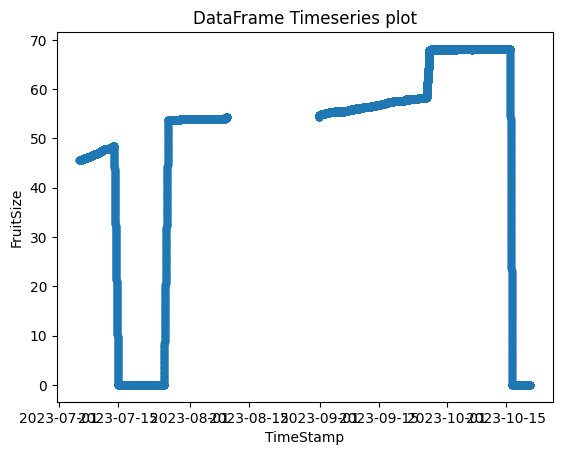

In [58]:
df.plot.scatter('TimeStamp', 'FruitSize', 
                title="DataFrame Timeseries plot")

# PyAgri focus

Import a `xlsx` spreadsheet containing both **hourly** and **daily** weather data

In [14]:
# save a dataframe with a variable name that tells you what's in the inside
hourly_weather_df = pd.read_excel('../data/spreadsheet/weather2022.xlsx', sheet_name='hourly',  parse_dates=['Time'])

explore the data you have

In [15]:
print(hourly_weather_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Time        8760 non-null   datetime64[ns]
 1   TAVG        8760 non-null   float64       
 2   PREC        8760 non-null   float64       
 3   RHAVG       8760 non-null   float64       
 4   RAD         8760 non-null   float64       
 5   W_SCAL_INT  8760 non-null   float64       
 6   W_VEC_DIR   8760 non-null   float64       
 7   W_VEC_INT   8760 non-null   float64       
 8   LEAFW       8760 non-null   int64         
 9   ET0         8760 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 684.5 KB
None


In [16]:
print(hourly_weather_df.describe())

                      Time         TAVG         PREC        RHAVG  \
count                 8760  8760.000000  8760.000000  8760.000000   
mean   2022-07-02 11:30:00    14.659498     0.064304    73.856164   
min    2022-01-01 00:00:00    -4.500000     0.000000    17.300000   
25%    2022-04-02 05:45:00     7.100000     0.000000    56.700000   
50%    2022-07-02 11:30:00    14.100000     0.000000    79.900000   
75%    2022-10-01 17:15:00    21.400000     0.000000    92.600000   
max    2022-12-31 23:00:00    39.100000    27.900000   100.000000   
std                    NaN     9.206136     0.534921    21.022277   

               RAD   W_SCAL_INT    W_VEC_DIR    W_VEC_INT       LEAFW  \
count  8760.000000  8760.000000  8760.000000  8760.000000  8760.00000   
mean    174.848059     2.014772   197.441164     1.849326     0.27500   
min       0.000000     0.000000     0.000000     0.000000     0.00000   
25%       0.000000     1.100000   105.400000     0.900000     0.00000   
50%       1.7

rename the `Time` column with a proper name

In [19]:
# get the dataframe columns
cols = hourly_weather_df.columns

# change column 'Time' to 'TimeStamp'
cols = ['TimeStamp' if col.find('Time') != -1 else col for col in cols]

# assign new column names to the hourly_weather_df
hourly_weather_df.columns = cols 

hourly_weather_df

,TimeStamp,TAVG,PREC,RHAVG,RAD,W_SCAL_INT,W_VEC_DIR,W_VEC_INT,LEAFW,ET0
0,2022-01-01 00:00:00,3.3,0.0,95.3,0.0,1.0,255.1,0.9,1,0.0
1,2022-01-01 01:00:00,2.1,0.0,99.5,0.0,0.9,158.9,0.8,1,0.0
2,2022-01-01 02:00:00,1.8,0.0,100.0,0.0,1.0,158.1,0.9,1,0.0
3,2022-01-01 03:00:00,1.2,0.0,100.0,0.0,1.0,14.6,0.9,1,0.0
4,2022-01-01 04:00:00,0.9,0.0,100.0,0.0,0.1,285.3,0.1,1,0.0
...,...,...,...,...,...,...,...,...,...,...
8755,2022-12-31 19:00:00,10.4,0.0,88.9,0.0,0.2,181.0,0.2,0,0.0
8756,2022-12-31 20:00:00,10.3,0.0,89.1,0.0,0.6,144.8,0.6,1,0.0
8757,2022-12-31 21:00:00,10.2,0.0,89.9,0.0,0.1,185.4,0.1,1,0.0
8758,2022-12-31 22:00:00,10.0,0.0,89.1,0.0,0.2,281.7,0.1,1,0.0


test the **correlation between Evapotranspiration (ET0) and Solar Radiation (RAD)**

In [26]:
# use labels to get the correlation value
hourly_weather_df.corr('pearson').at['ET0', 'RAD']

0.9676899997554068

visualize the relationship between the variables

<Axes: title={'center': 'ET0 vs RAD'}, xlabel='ET0', ylabel='RAD'>

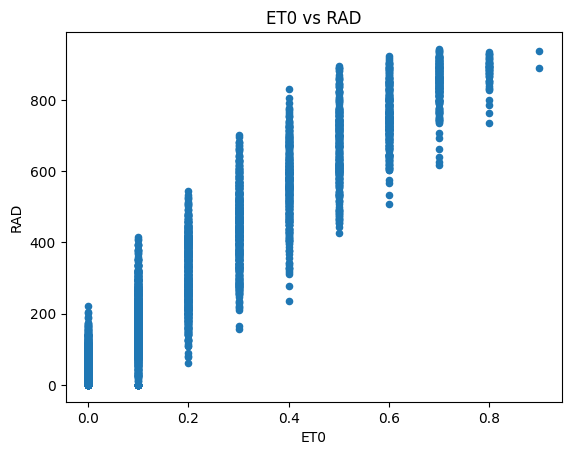

In [31]:
hourly_weather_df.plot.scatter('ET0', 'RAD',
                               title='ET0 vs RAD')